# Forecasting

### Student: Rodolfo Lerma

In this assignment, we will explore the python package [statsmodels](http://www.statsmodels.org/dev/tsa.html) to forecast the time series data. You will learn to use different time series modeling technique for forecasting.

Learning Objectives:

- Decompose time series into autocorrelation, seasonality, trend, and noise. 
- Explain the effects of exponential smoothing models and differentiate them from other models.
- Apply and evaluate the results of an autoregressive model. 
- Apply and evaluate the results of a moving average model. 
- Apply and evaluate the results of an autoregressive integrated moving average model.
- Apply and evaluate the results of ARIMA model for forecasting (time series prediction).


In [1]:
# # install packages
# import sys
# !pip3 install --prefix {sys.prefix} statsmodels

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

----------

## Air Passenger Dataset
This dataset provides monthly totals of international airline passengers from 1949 to 1960. You can find a copy of the dataset on [Kaggle](https://www.kaggle.com/rakannimer/air-passengers) or [R datasets](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html).

In [3]:
df = pd.read_csv('./airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)
df= df.rename(columns={'airline passengers': 'passengers'})
df.head()

,passengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


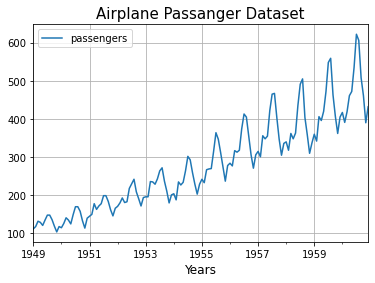

In [4]:
# split the data into train and test
train, test = df.iloc[:130, [0]], df.iloc[130:, [0]]

df.plot()
pyplot.title('Airplane Passanger Dataset', fontsize = 15)
pyplot.xlabel('Years', fontsize = 12)
pyplot.grid()
pyplot.show()

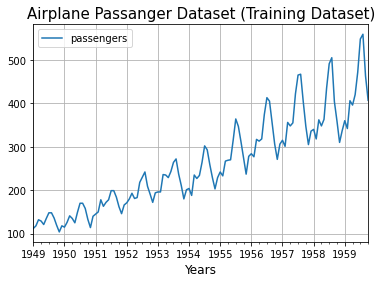

In [5]:
train.plot()
pyplot.title('Airplane Passanger Dataset (Training Dataset)', fontsize = 15)
pyplot.xlabel('Years', fontsize = 12)
pyplot.grid()
pyplot.show()

In [6]:
train.shape

(130, 1)

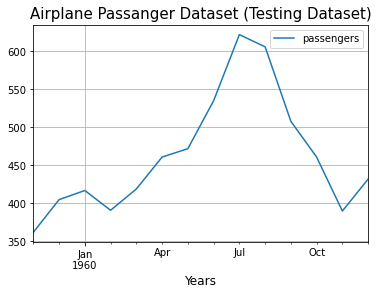

In [7]:
test.plot()
pyplot.title('Airplane Passanger Dataset (Testing Dataset)', fontsize = 15)
pyplot.xlabel('Years', fontsize = 12)
pyplot.grid()
pyplot.show()

In [8]:
test.shape

(14, 1)

<AxesSubplot:ylabel='passengers'>

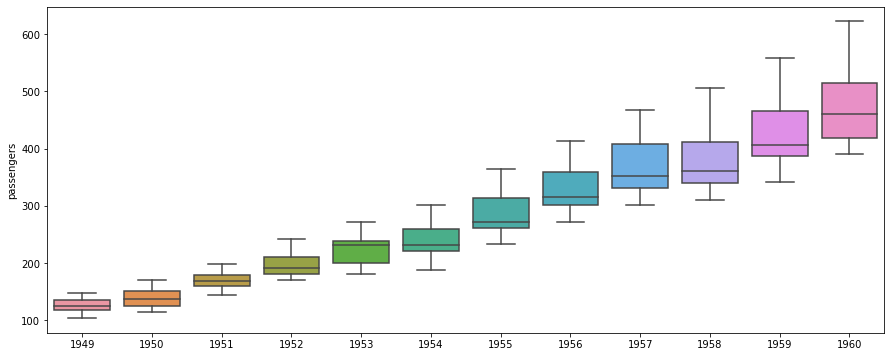

In [9]:
import seaborn as sns
fig, ax = pyplot.subplots(figsize=(15,6))
sns.boxplot(df.passengers.index.year, df.passengers, ax=ax)

In [10]:
test_size = test.shape[0]

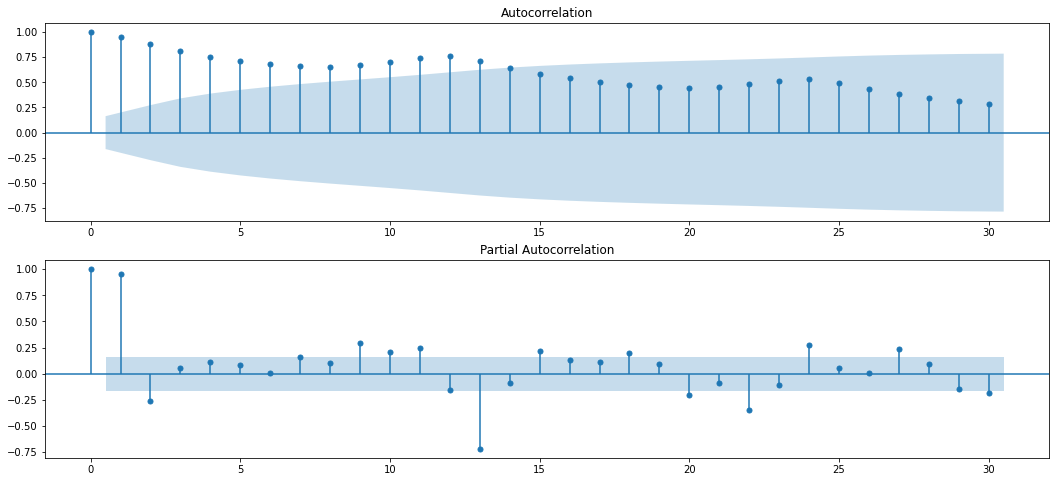

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
pyplot.figure()
pyplot.subplot(211)
plot_acf(df.passengers, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(df.passengers, ax=pyplot.gca(), lags = 30)
pyplot.show()

### Question 1.1: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply additive decomposition to the airline passenger dataset and plot each components from the decomposition.

In [12]:
# additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

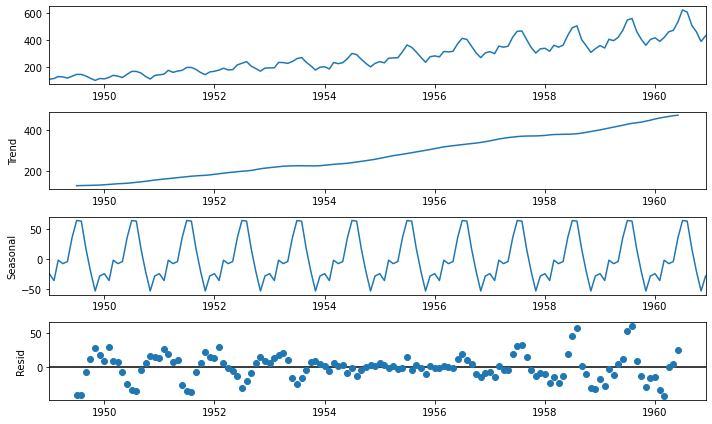

In [13]:
rcParams['figure.figsize'] = 10, 6
result = seasonal_decompose(df, model='additive')
fig = result.plot()
pyplot.show()

### Question 1.2: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply multiplication decomposition to the same airline passenger dataset and plot each components from the decomposition. Which decomposition makes more sense in this dataset? 

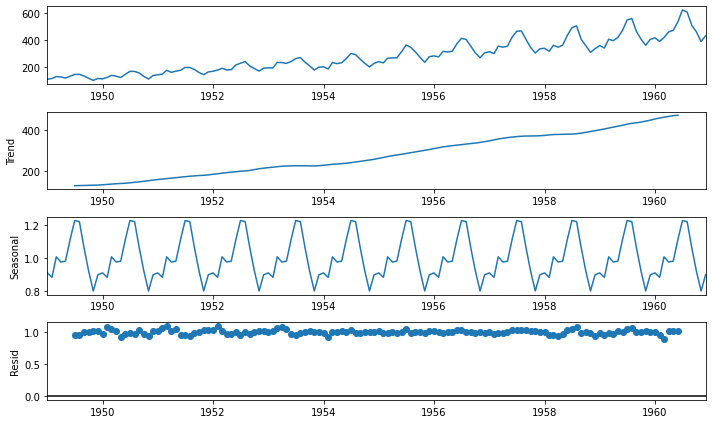

In [14]:
# multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 10, 6
results = seasonal_decompose(df, model='multiplicative')
fig = results.plot()
pyplot.show()

----------

### Question 2.1: Apply the simple exponential smoothing technique ([SimpleExpSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameter `smoothing_level` and see how it impacts the model accuracy. 

In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [16]:
#Alpha = 0.2
fit1 = SimpleExpSmoothing(train, 
                          initialization_method="heuristic").fit(smoothing_level=0.2, 
                                                                 optimized=False)
fcast1 = fit1.forecast(test_size).rename(r"$\alpha=0.2$")

#Alpha = 0.6                                                                 
fit2 = SimpleExpSmoothing(train, 
                          initialization_method="heuristic").fit(smoothing_level=0.6, 
                                                                 optimized=False)
fcast2 = fit2.forecast(test_size).rename(r"$\alpha=0.6$")

#Alpha = 0.8                                                                   
fit3 = SimpleExpSmoothing(train, 
                          initialization_method="heuristic").fit(smoothing_level=0.8, 
                                                                 optimized=False)
fcast3 = fit3.forecast(test_size).rename(r"$\alpha=0.8$")

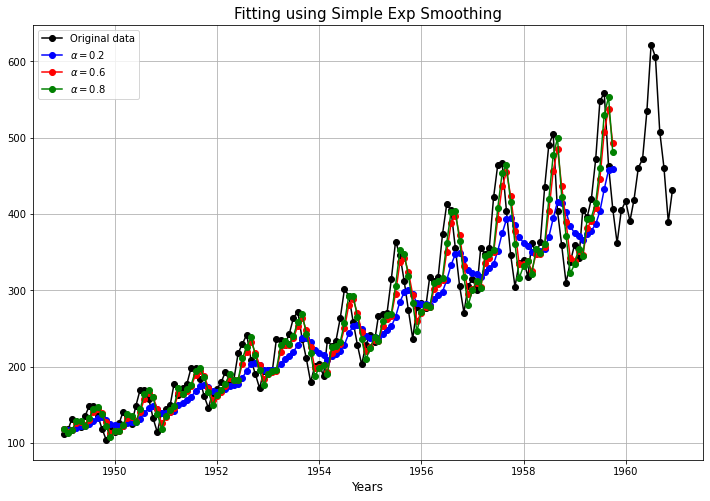

In [17]:
pyplot.figure(figsize=(12, 8))
pyplot.plot(df, marker="o", color="black", label = "Original data")
pyplot.plot(fit1.fittedvalues, marker="o", color="blue", label = r"$\alpha=0.2$")
pyplot.plot(fit2.fittedvalues, marker="o", color="red", label = r"$\alpha=0.6$")
pyplot.plot(fit3.fittedvalues, marker="o", color="green", label = r"$\alpha=0.8$")
pyplot.title('Fitting using Simple Exp Smoothing', fontsize = 15)
pyplot.xlabel('Years', fontsize = 12)
pyplot.grid()
pyplot.legend()

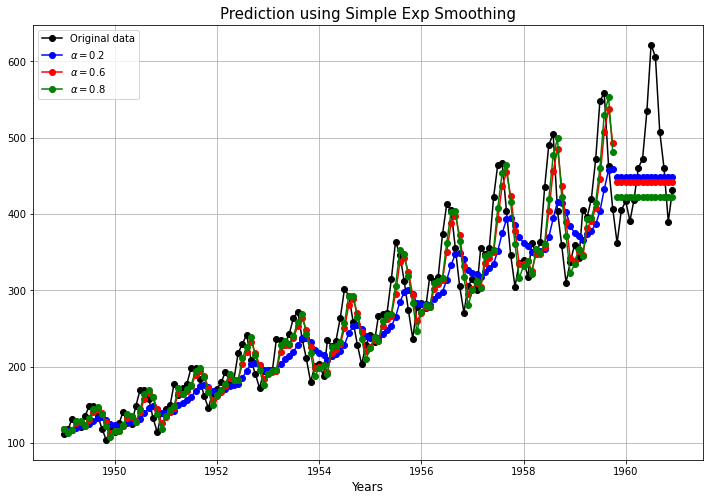

In [18]:
pyplot.figure(figsize=(12, 8))
pyplot.plot(df, marker="o", color="black", label = "Original data")
pyplot.plot(fit1.fittedvalues, marker="o", color="blue", label = r"$\alpha=0.2$")
(line1,) = pyplot.plot(fcast1, marker="o", color="blue")
pyplot.plot(fit2.fittedvalues, marker="o", color="red", label = r"$\alpha=0.6$")
(line2,) = pyplot.plot(fcast2, marker="o", color="red")
pyplot.plot(fit3.fittedvalues, marker="o", color="green", label = r"$\alpha=0.8$")
(line3,) = pyplot.plot(fcast3, marker="o", color="green")
pyplot.title('Prediction using Simple Exp Smoothing', fontsize = 15)
pyplot.xlabel('Years', fontsize = 12)
pyplot.grid()
pyplot.legend()

In [19]:
print("rmse: " + str(sqrt(mean_squared_error(test, fcast1))))
print("mae: " + str(mean_absolute_error(test, fcast1)))

rmse: 77.93050298629963
mae: 60.642857142857146


## [Example for this method](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html)

----------

### Question 2.2: Apply the HWES technique ([ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
#Alpha = 0.2
expfit1 = ExponentialSmoothing(train, 
                               initialization_method="heuristic").fit(smoothing_level=0.2, 
                                                                 optimized=False)
expfcast1 = expfit1.forecast(test_size).rename(r"$\alpha=0.2$")

Alpha = 0.6                                                                 
expfit2 = ExponentialSmoothing(train,initialization_method="estimated",seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.2, optimized=False)
expfcast2 = expfit2.forecast(test_size).rename(r"$\alpha=0.6$")

#Alpha = 0.8                                                                   
expfit3 = ExponentialSmoothing(train, 
                          initialization_method="heuristic").fit(smoothing_level=0.2, 
                                                                 optimized=False)
expfcast3 = expfit3.forecast(test_size).rename(r"$\alpha=0.8$")

TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [22]:
expfit2 = ExponentialSmoothing(train).fit(smoothing_level=0.4, optimized=False)

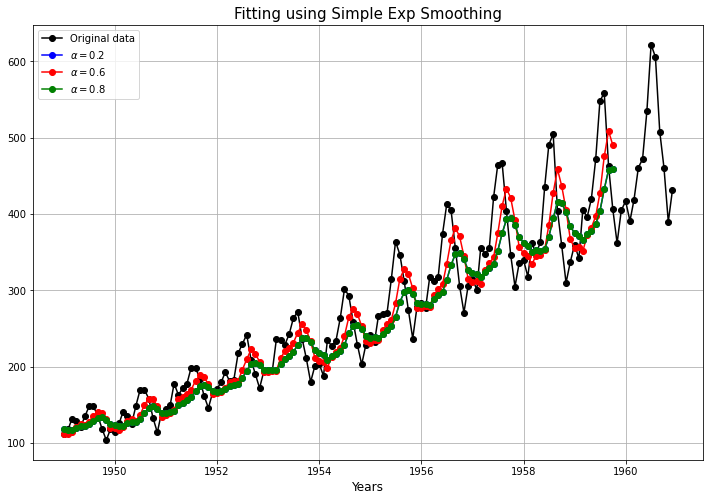

In [23]:
pyplot.figure(figsize=(12, 8))
pyplot.plot(df, marker="o", color="black", label = "Original data")
pyplot.plot(expfit1.fittedvalues, marker="o", color="blue", label = r"$\alpha=0.2$")
pyplot.plot(expfit2.fittedvalues, marker="o", color="red", label = r"$\alpha=0.6$")
pyplot.plot(expfit3.fittedvalues, marker="o", color="green", label = r"$\alpha=0.8$")
pyplot.title('Fitting using Simple Exp Smoothing', fontsize = 15)
pyplot.xlabel('Years', fontsize = 12)
pyplot.grid()
pyplot.legend()

NameError: name 'expfcast2' is not defined

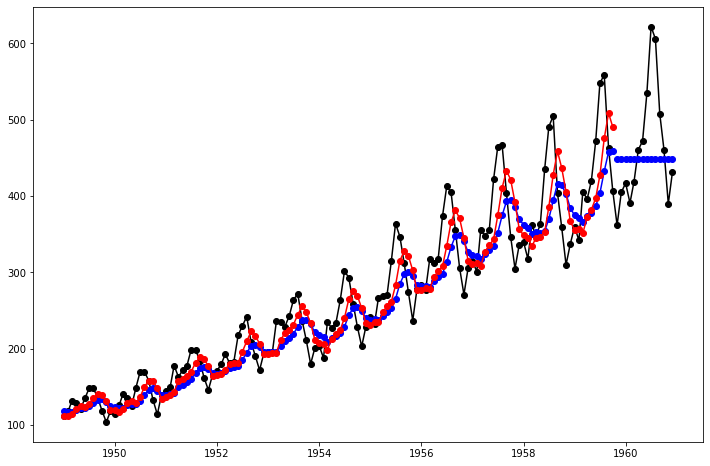

In [24]:
pyplot.figure(figsize=(12, 8))
pyplot.plot(df, marker="o", color="black", label = "Original data")
pyplot.plot(expfit1.fittedvalues, marker="o", color="blue", label = r"$\alpha=0.2$")
(line1,) = pyplot.plot(expfcast1, marker="o", color="blue")
pyplot.plot(expfit2.fittedvalues, marker="o", color="red", label = r"$\alpha=0.6$")
(line2,) = pyplot.plot(expfcast2, marker="o", color="red")
pyplot.plot(expfit3.fittedvalues, marker="o", color="green", label = r"$\alpha=0.8$")
(line3,) = pyplot.plot(expfcast3, marker="o", color="green")
pyplot.title('Prediction using Exponential Smoothing', fontsize = 15)
pyplot.xlabel('Years', fontsize = 12)
pyplot.grid()
pyplot.legend()

In [26]:
print("rmse:" + str(sqrt(mean_squared_error(test, expfcast1))))
print("mae:" + str(mean_absolute_error(test, expfcast1)))

rmse:77.93050298629963
mae:60.642857142857146


-----

### Question 3.1: Apply Autoregression model ([AR](http://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [27]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random

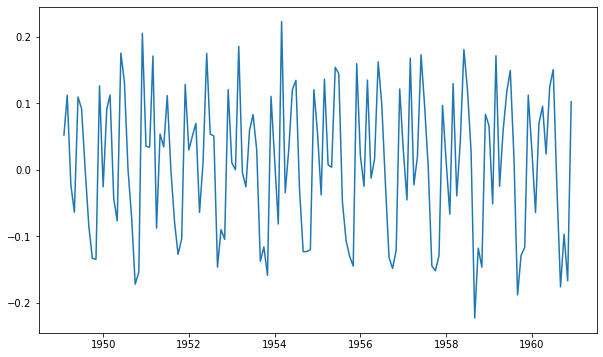

In [28]:
ts_log = np.log(df)
ts_log_diff = ts_log.passengers - ts_log.passengers.shift()
pyplot.plot(ts_log_diff)

In [29]:
model = AR(train)
model_fit = model.fit()

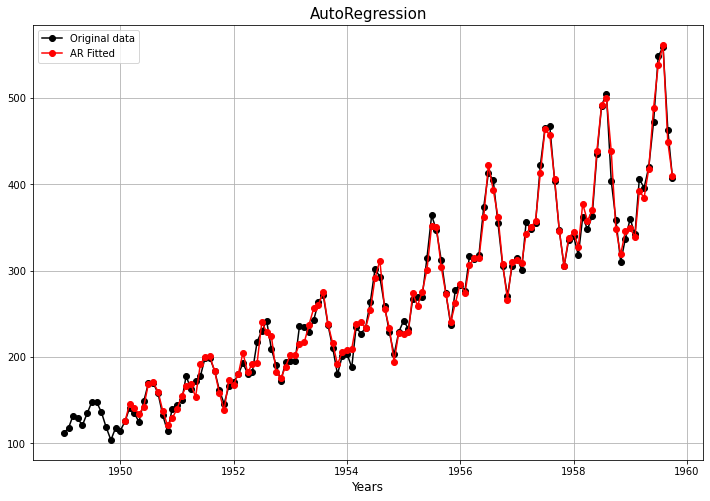

In [37]:
pyplot.figure(figsize=(12, 8))
pyplot.plot(train, marker="o", color="black", label = "Original data")
pyplot.plot(model_fit.fittedvalues, marker="o", color='red', label = "AR Fitted")
pyplot.title('AutoRegression', fontsize = 15)
pyplot.xlabel('Years', fontsize = 12)
pyplot.grid()
pyplot.legend()

In [31]:
AR_predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

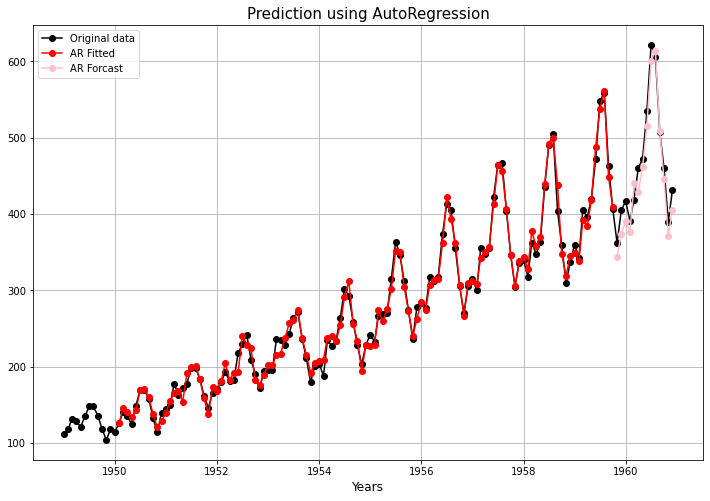

In [36]:
pyplot.figure(figsize=(12, 8))
pyplot.plot(df, marker="o", color="black", label = "Original data")
pyplot.plot(model_fit.fittedvalues, marker="o", color='red', label = "AR Fitted")
pyplot.plot(AR_predictions, marker="o", color='pink', label = "AR Forcast")
pyplot.title('Prediction using AutoRegression', fontsize = 15)
pyplot.xlabel('Years', fontsize = 12)
pyplot.grid()
pyplot.legend()

In [33]:
print("rmse:" + str(sqrt(mean_squared_error(test, AR_predictions))))
print("mae:" + str(mean_absolute_error(test, AR_predictions)))

rmse:20.516121690394
mae:18.752262036860934


----------

### Question 3.2: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [34]:
# MA example


# fit model


# make prediction
)

#print RMSE and MAE

SyntaxError: unmatched ')' (<ipython-input-34-7185961a8529>, line 8)

----------

### Questio 4.1: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [ ]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

# fit model


# make prediction


#print RMSE and MAE

----------

### Question 4.2: Apply Moving Average model ([ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [ ]:
# ARIMA example


# fit model


# make prediction


#print RMSE and MAE

### Question 5: After running through various time series models, summarize your findings. 

### Question 6. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. 

- What was your incoming experience with this model, if any? 
- What steps you took, what obstacles you encountered. 
- How you link this exercise to real-world, machine learning problem-solving?
- What steps were missing? 
- What else do you need to learn?